<a href="https://colab.research.google.com/github/harishankarr23/machine-learning/blob/main/Copy_of_Online_food_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/onlinefoods.csv")

In [ ]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [ ]:
df.tail()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes
387,23,Male,Single,Student,No Income,Post Graduate,5,12.8988,77.5764,560078,Yes,Positive,Yes


In [ ]:
df.shape

(388, 13)

In [ ]:
df.dtypes

Age                             int64
Gender                         object
Marital Status                 object
Occupation                     object
Monthly Income                 object
Educational Qualifications     object
Family size                     int64
latitude                      float64
longitude                     float64
Pin code                        int64
Output                         object
Feedback                       object
Unnamed: 12                    object
dtype: object

In [ ]:
df.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

EDA


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set_theme(style="whitegrid")

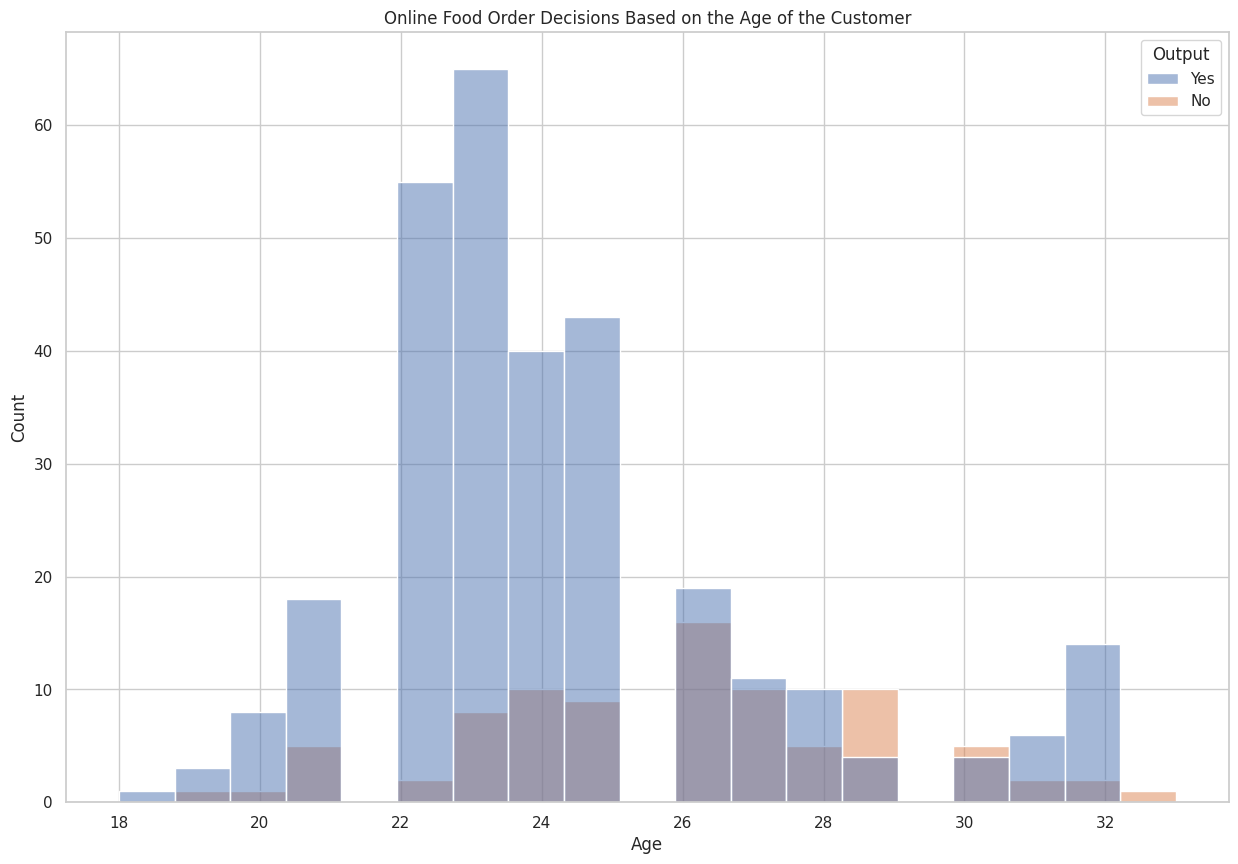

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("Online Food Order Decisions Based on the Age of the Customer")
sns.histplot(x="Age", hue="Output", data=df)
plt.show()

We can see that the age group of 22-25 ordered the food often again. It also means this age group is the target of online food delivery companies

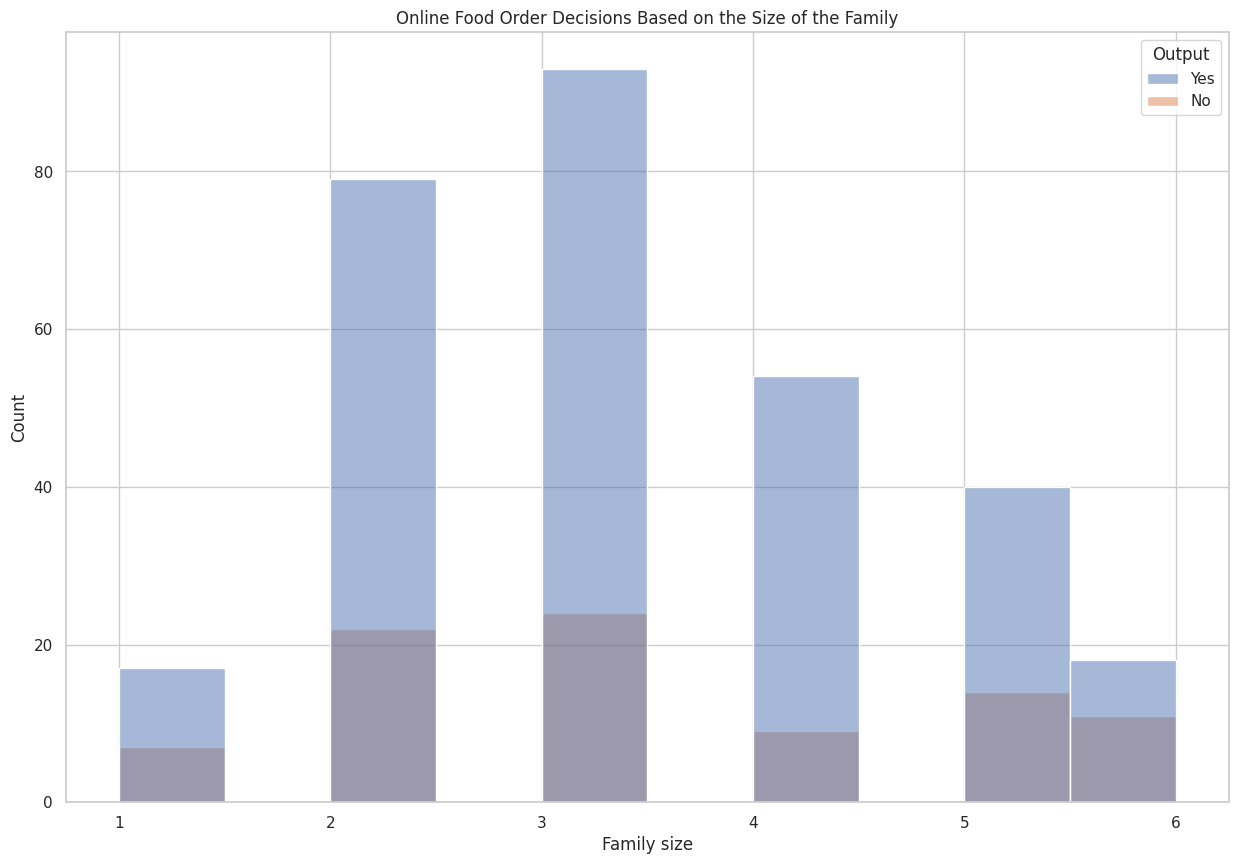

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("Online Food Order Decisions Based on the Size of the Family")
sns.histplot(x="Family size", hue="Output", data=df)
plt.show()

Families with 2 and 3 members are ordering food often. These can be roommates, couples, or a family of three.

In [ ]:
#Let’s create a dataset of all the customers who ordered the food again:
buying_again_data=df[df["Output"]=="Yes"]
buying_again_data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


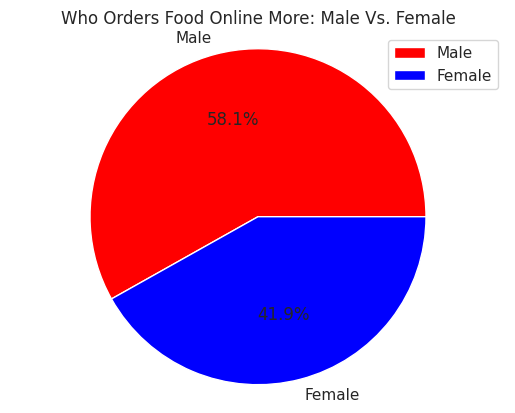

In [ ]:
gender=buying_again_data["Gender"].value_counts()
label=gender.index
counts=gender.values
plt.pie(counts,labels=label,colors=["red","blue"],autopct='%1.1f%%')
plt.axis("equal")
plt.title("Who Orders Food Online More: Male Vs. Female")
plt.legend()
plt.show()

According to the dataset, male customers are ordering more compared the females.

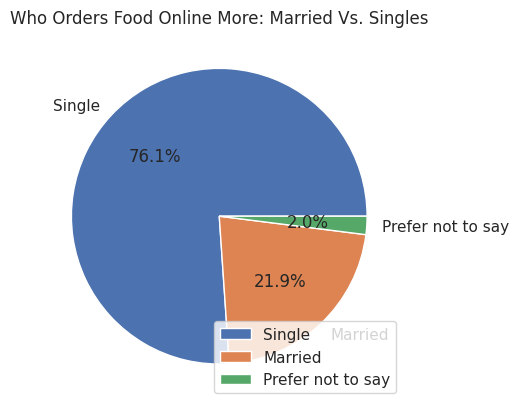

In [ ]:
marital_status=buying_again_data["Marital Status"].value_counts()
label=marital_status.index
marital_count=marital_status.values
plt.pie(marital_count,labels=label,autopct="%1.1f%%")
plt.title("Who Orders Food Online More: Married Vs. Singles")
plt.legend()
plt.show()

According to the above figure, 76.1% of the frequent customers are singles

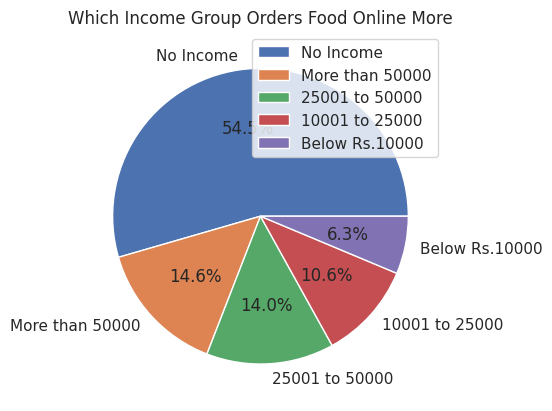

In [ ]:
monthly_income=buying_again_data["Monthly Income"].value_counts()
label=monthly_income.index
counts=monthly_income.values
plt.pie(counts,labels=label,autopct="%1.1f%%")
plt.title("Which Income Group Orders Food Online More")
plt.legend()
plt.show()

According to the above figure, 54% of the customers don’t fall under any income group. They can be housewives or students.

Now let’s prepare the data for the task of training a machine learning model. Here I will convert all the categorical features into numerical values:

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df["Gender"]=label.fit_transform(df["Gender"])
df["Marital Status"]=label.fit_transform(df["Marital Status"])
df["Occupation"]=label.fit_transform(df["Occupation"])
df["Educational Qualifications"]=label.fit_transform(df["Educational Qualifications"])
df["Monthly Income"]=label.fit_transform(df['Monthly Income'])
df["Feedback"]=label.fit_transform(df["Feedback"])


In [ ]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,Yes,1,Yes
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,Yes,1,Yes
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,Yes,0,Yes
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,Yes,1,Yes
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,Yes,1,Yes


Online Food Order Prediction Model


In [ ]:
from sklearn.model_selection import train_test_split
x = np.array(df[["Age", "Gender", "Marital Status", "Occupation",
                   "Monthly Income", "Educational Qualifications",
                   "Family size", "Pin code", "Feedback"]])
y = np.array(df[["Output"]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
x_train

array([[    21,      1,      2, ...,      3, 560085,      1],
       [    22,      1,      2, ...,      4, 560010,      1],
       [    21,      1,      2, ...,      2, 560046,      0],
       ...,
       [    23,      1,      2, ...,      2, 560021,      1],
       [    20,      1,      2, ...,      2, 560034,      1],
       [    22,      0,      2, ...,      3, 560066,      1]])

In [ ]:
x_test


array([[    21,      0,      2, ...,      2, 560021,      0],
       [    24,      0,      2, ...,      3, 560009,      1],
       [    24,      0,      2, ...,      5, 560051,      1],
       ...,
       [    18,      1,      2, ...,      5, 560002,      1],
       [    23,      0,      2, ...,      3, 560008,      0],
       [    24,      0,      2, ...,      5, 560015,      0]])

In [ ]:
y_train

array([['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['

In [ ]:
y_test

array([['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-1.21800832,  0.85212361,  0.68961786, ..., -0.16517524,
         1.42497028,  0.48728115],
       [-0.88759766,  0.85212361,  0.68961786, ...,  0.56863606,
        -0.92131301,  0.48728115],
       [-1.21800832,  0.85212361,  0.68961786, ..., -0.89898654,
         0.20490297, -2.05220332],
       ...,
       [-0.55718699,  0.85212361,  0.68961786, ..., -0.89898654,
        -0.57719146,  0.48728115],
       [-1.54841899,  0.85212361,  0.68961786, ..., -0.89898654,
        -0.17050236,  0.48728115],
       [-0.88759766, -1.17353866,  0.68961786, ..., -0.16517524,
         0.83057852,  0.48728115]])

In [ ]:
#Now let’s train the machine learning model:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array(['No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'No'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
knn_accuracy=accuracy_score(y_test,y_pred)
knn_accuracy

0.8803418803418803

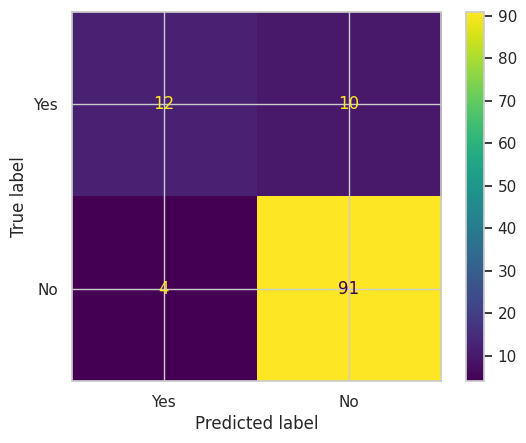

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
label=["Yes","No"]
matrix=confusion_matrix(y_test,y_pred)
dis=ConfusionMatrixDisplay(matrix,display_labels=label)
dis.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.75      0.55      0.63        22
         Yes       0.90      0.96      0.93        95

    accuracy                           0.88       117
   macro avg       0.83      0.75      0.78       117
weighted avg       0.87      0.88      0.87       117



In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussian_model=GaussianNB()
gaussian_model.fit(x_train,y_train)
y_pred_gaussian=gaussian_model.predict(x_test)
y_pred_gaussian

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'No'], dtype='<U3')

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report
matrix_gaussian=confusion_matrix(y_test,y_pred_gaussian)
matrix_gaussian


array([[14,  8],
       [10, 85]])

In [ ]:
label=["Yes","No"]
dis_gaussian=ConfusionMatrixDisplay(matrix_gaussian,display_labels=label)
dis_gaussian.plot

<bound method ConfusionMatrixDisplay.plot of <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7dc6a4502b00>>

In [ ]:
naive_accuracy=accuracy_score(y_test,y_pred_gaussian)
naive_accuracy

0.8461538461538461

In [ ]:
naive_classification=classification_report(y_test,y_pred_gaussian)
print(naive_classification)



              precision    recall  f1-score   support

          No       0.58      0.64      0.61        22
         Yes       0.91      0.89      0.90        95

    accuracy                           0.85       117
   macro avg       0.75      0.77      0.76       117
weighted avg       0.85      0.85      0.85       117



Now let’s prepare a form to input the data of the customer and predict whether the customer will order the food again or not:

In [ ]:
print("Enter Customer Details to Predict If the Customer Will Order Again")
a = int(input("Enter the Age of the Customer: "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
e = int(input("Monthly Income: "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
g = int(input("Family Size: "))
h = int(input("Pin Code: "))
i = int(input("Review of the Last Order (1 = Positive, 0 = Negative): "))
features = np.array([[a, b, c, d, e, f, g, h, i]])
print("Finding if the customer will order again: ",gaussian_model.predict(features))

Enter Customer Details to Predict If the Customer Will Order Again
Enter the Age of the Customer: 24
Enter the Gender of the Customer (1 = Male, 0 = Female): 0
Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): 2
Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): 4
Monthly Income: 0
Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): 3
Family Size: 4
Pin Code: 560001
Review of the Last Order (1 = Positive, 0 = Negative): 0
Finding if the customer will order again:  ['Yes']
